In [20]:
!pip install dabl

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import dabl

In [2]:
student_performance = pd.read_csv('exams.csv')
student_performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [3]:
student_performance.shape

(1000, 8)

In [4]:
len(student_performance)

1000

In [5]:
student_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
student_performance.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
student_performance.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Check the Effect of Lunch on Student’s Performnce

In [35]:
student_performance[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        54.0           66.0           66.0
             male          62.0           58.0           62.0
standard     female        67.0           75.0           75.0
             male          74.0           69.0           71.0

In [ ]:
# check the effect of test preparations on students scores

In [44]:
student_performance[['test preparation course','gender',
                     'math score',
                     'writing score',
                     'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        65.5           76.5           76.0
                        male          74.0           73.0           73.0
none                    female        62.0           69.0           71.0
                        male          68.0           61.0           63.0

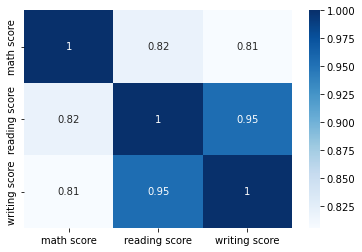

In [9]:
sns.heatmap(student_performance[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']].corr(), cmap='Blues', annot=True)
plt.show()

Target looks like regression


C:\Users\Henry Morgan\anaconda3\lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly correlated (0.9507674677899651) feature writing score. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=8.14E-01'}, xlabel='reading score', ylabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.39E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=6.05E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=3.41E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot:title={'center':'F=1.68E-02'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

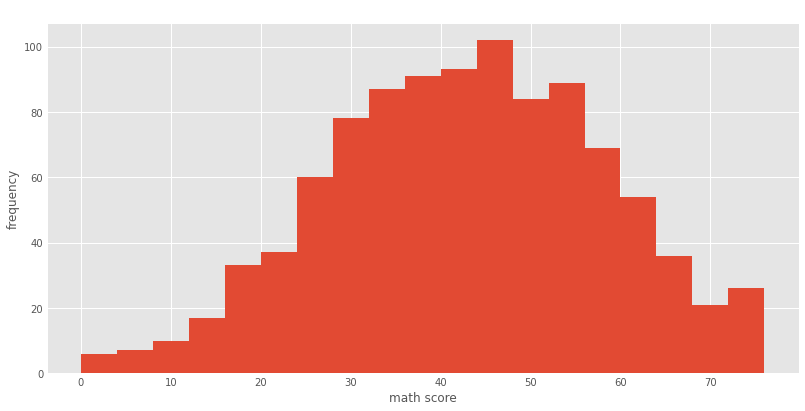

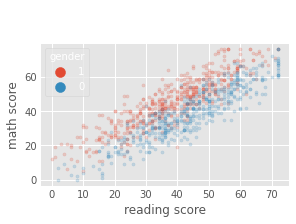

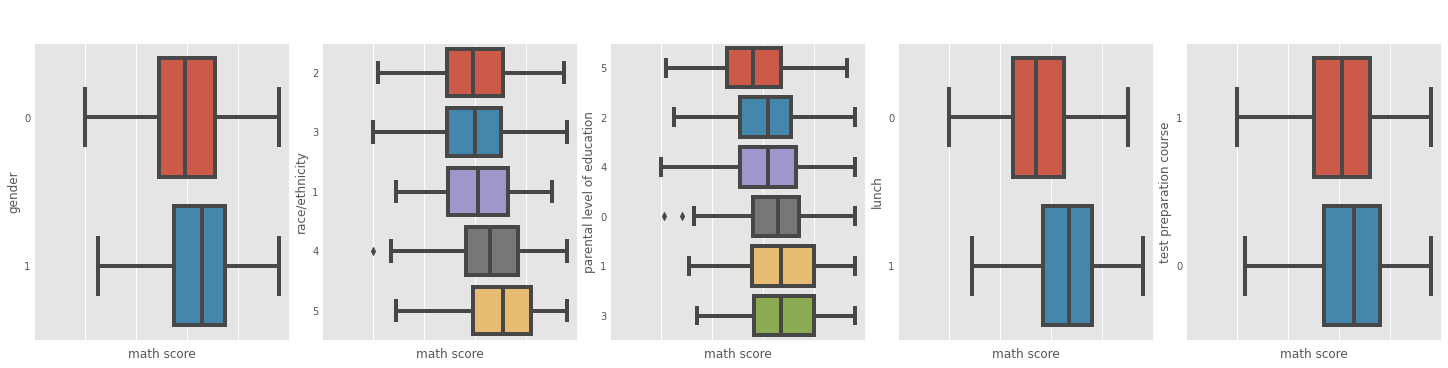

In [98]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')
dabl.plot(student_performance, target_col = 'math score')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=9.51E-01'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=8.14E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.81E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=2.30E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=1.19E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <AxesSubplot:title={'center':'F=7.45E-04'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

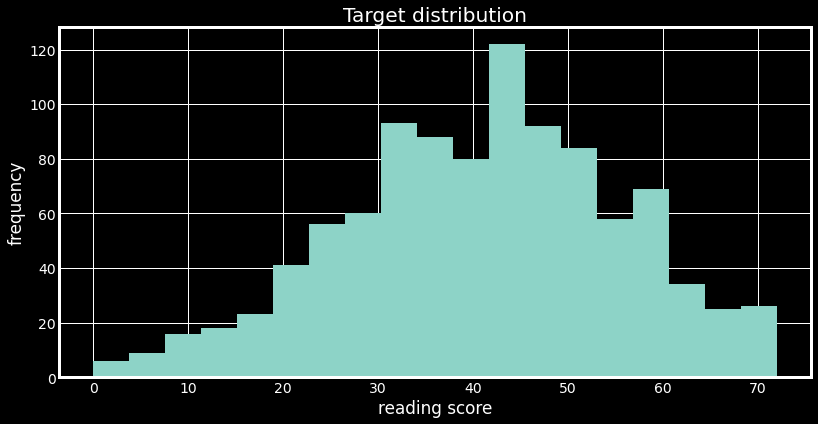

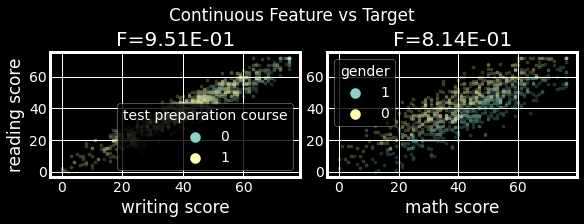

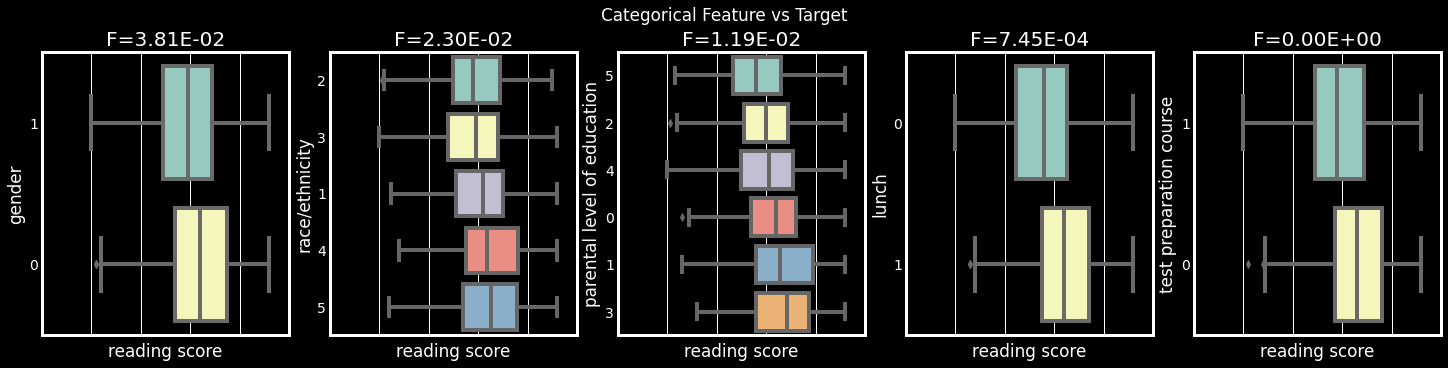

In [97]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('dark_background')
dabl.plot(student_performance, target_col = 'reading score')

C:\Users\Henry Morgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


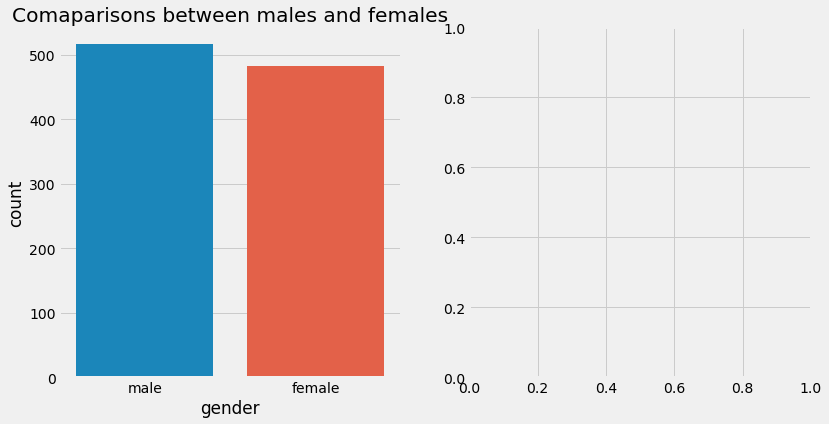

In [34]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(student_performance['gender'], ax=axarr[0]).set_title('Comaparisons between males and females')

C:\Users\Henry Morgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


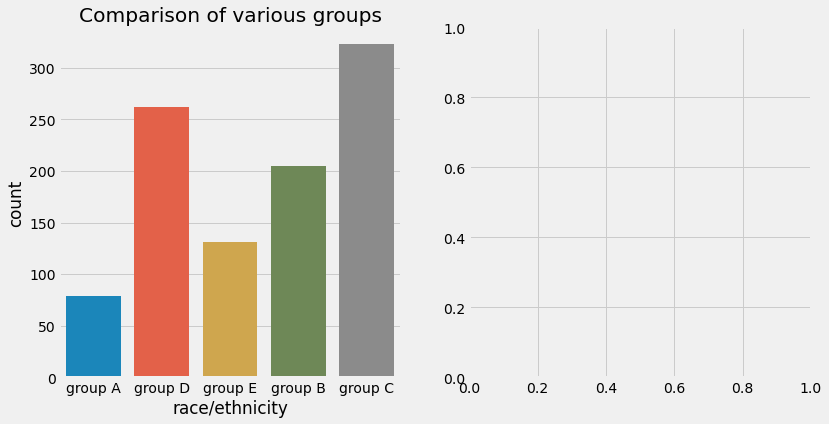

In [47]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(student_performance['race/ethnicity'],ax=axarr[0]).set_title('Comparison of various groups')

C:\Users\Henry Morgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


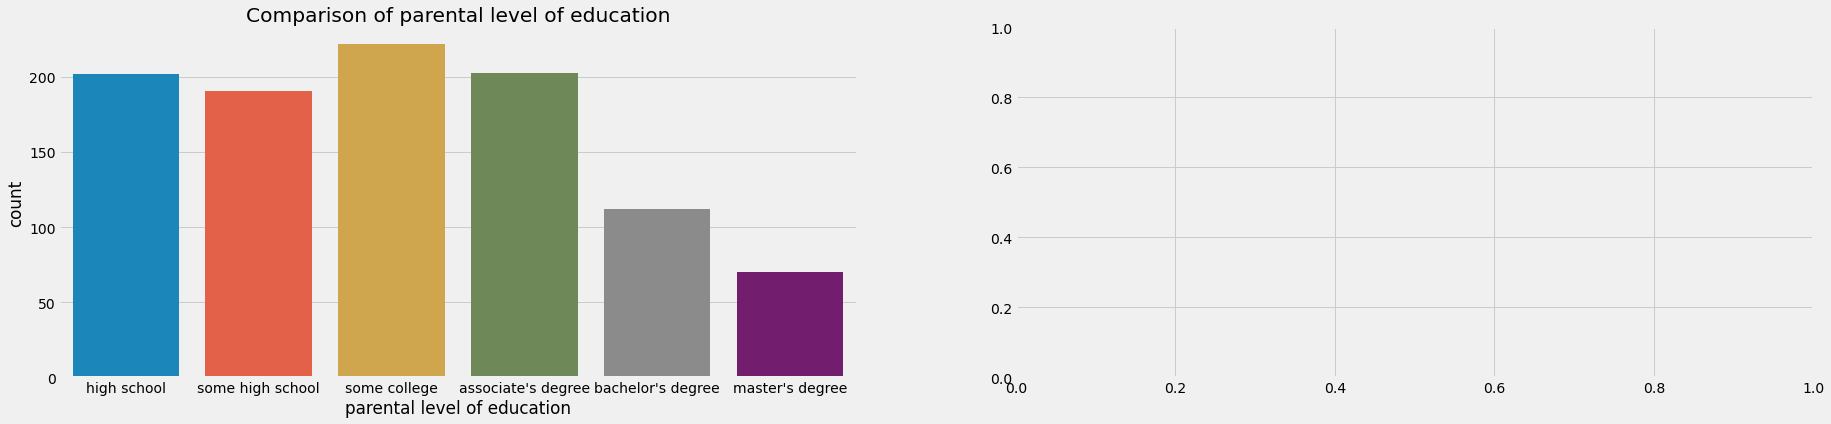

In [53]:
fig, axarr = plt.subplots(1, 2, figsize=(28,6))
a = sns.countplot(student_performance['parental level of education'],ax=axarr[0]).set_title('Comparison of parental level of education')

In [59]:
student_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
student_performance['test preparation course'] = le.fit_transform(student_performance['test preparation course'])

# label encoding for lunch
student_performance['lunch'] = le.fit_transform(student_performance['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
student_performance['race/ethnicity'] = student_performance['race/ethnicity'].replace('group A', 1)
student_performance['race/ethnicity'] = student_performance['race/ethnicity'].replace('group B', 2)
student_performance['race/ethnicity'] = student_performance['race/ethnicity'].replace('group C', 3)
student_performance['race/ethnicity'] = student_performance['race/ethnicity'].replace('group D', 4)
student_performance['race/ethnicity'] = student_performance['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
student_performance['parental level of education'] = le.fit_transform(student_performance['parental level of education'])

#label encoding for gender
student_performance['gender'] = le.fit_transform(student_performance['gender'])

# label encoding for pass_math
student_performance['math score'] = le.fit_transform(student_performance['math score'])

# label encoding for pass_reading
student_performance['reading score'] = le.fit_transform(student_performance['reading score'])

# label encoding for pass_writing
student_performance['writing score'] = le.fit_transform(student_performance['writing score'])



In [67]:
x = student_performance.iloc[:,1:7]
y = student_performance.iloc[:,0]

In [68]:
print(x.shape)
print(y.shape)

(1000, 6)
(1000,)


In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 6)
(750,)
(250, 6)
(250,)


In [70]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [78]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8213333333333334
Testing Accuracy : 0.78


In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

array([0.83, 0.82, 0.8 , 0.78, 0.82])

In [74]:
y_preds = model.predict(x_test)

In [76]:
y_preds[:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [77]:
y_test.mean()

0.452

In [85]:
# Make predictions with probabilities
y_probs = model.predict_proba(x_test)

In [86]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.45131375, 0.46042391, 0.66937655, 0.74195035, 0.65036189,
       0.60245449, 0.46167079, 0.56393639, 0.63291076, 0.53276256])

In [88]:
# Caculate fpr, tpr and thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00729927, 0.00729927, 0.01459854, 0.01459854, 0.02189781,
       0.02189781, 0.03649635, 0.03649635, 0.04379562, 0.04379562,
       0.05109489, 0.05109489, 0.05839416, 0.05839416, 0.06569343,
       0.06569343, 0.0729927 , 0.0729927 , 0.08029197, 0.08029197,
       0.08029197, 0.08029197, 0.08759124, 0.08759124, 0.09489051,
       0.09489051, 0.10948905, 0.10948905, 0.11678832, 0.11678832,
       0.13138686, 0.13138686, 0.13868613, 0.13868613, 0.15328467,
       0.15328467, 0.16058394, 0.16058394, 0.16788321, 0.16788321,
       0.17518248, 0.17518248, 0.23357664, 0.23357664, 0.26277372,
       0.26277372, 0.2919708 , 0.2919708 , 0.29927007, 0.29927007,
       0.30656934, 0.30656934, 0.31386861, 0.31386861, 0.33576642,
       0.33576642, 0.3649635 , 0.3649635 , 0.37956204, 0.37956204,
       0.38686131, 0.38686131, 0.41605839, 0.41605839, 0.43065693,
       0.43065693, 0.44525547, 0.44525547, 0.46715328, 0.46715

In [91]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[105,  32],
       [ 23,  90]], dtype=int64)

In [92]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,105,32
1,23,90


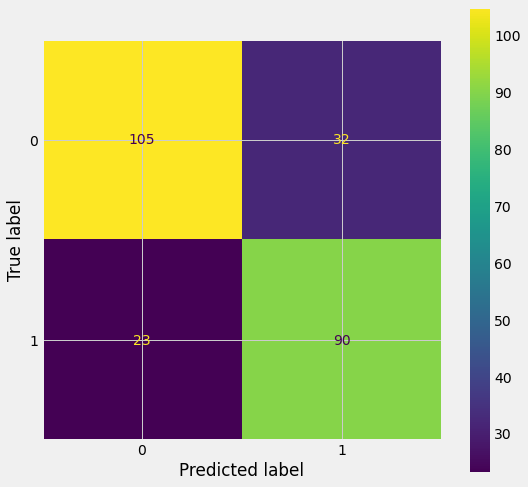

In [96]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);